# Sentiment Analysis Of Reviews

In [4]:
# Loading the dataset
import pandas as pd

In [5]:
df_yelp = pd.read_table("yelp.txt")
df_amazon = pd.read_table("amazon.txt")
df_imdb = pd.read_table("imdb.txt")

In [6]:
frames = [df_yelp, df_amazon, df_imdb ]

In [7]:
for col_name in frames:
    col_name.columns = ["Message", "Target"]

In [8]:
for col_name in frames:
    print(col_name.columns)

Index(['Message', 'Target'], dtype='object')
Index(['Message', 'Target'], dtype='object')
Index(['Message', 'Target'], dtype='object')


In [9]:
ind_key = ["YELP","AMAZON","IMDB"]

In [10]:
df = pd.concat(frames, keys=ind_key)

In [11]:
df.shape

(2745, 2)

In [12]:
df.head()

Message  Target
YELP 0                                 Crust is not good.       0
     1          Not tasty and the texture was just nasty.       0
     2  Stopped by during the late May bank holiday of...       1
     3  The selection on the menu was great and so wer...       1
     4     Now I am getting angry and I want my damn pho.       0

In [13]:
df.tail()

Message  Target
IMDB 742  I just got bored watching Jessice Lange take h...       0
     743  Unfortunately, any virtue in this film's produ...       0
     744                   In a word, it is embarrassing.         0
     745                               Exceptionally bad!         0
     746  All in all its an insult to one's intelligence...       0

In [14]:
df.isnull().sum()

Message    0
Target     0
dtype: int64

# Spacy Operations 

In [15]:
import spacy
nlp = spacy.load('en')

In [16]:
from spacy.lang.en import STOP_WORDS
stopwords = list(STOP_WORDS)

In [17]:
import string
punctuations = string.punctuation

In [18]:
from spacy.lang.en import English
parser = English()

In [19]:
def spacy_tokenizer(sentence):
    my_token= parser(sentence)
    my_token = [word.lemma_.lower().strip() if word.lemma_ != "PRON" else word.lower_ for word in my_token ]
    my_token = [word for word in my_token if word not in stopwords and word not in punctuations ]
    return my_token

#  Using ML

In [20]:
# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [21]:
# Custom transformer using spacy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X ]
    def fit(self, X, y=None , **fit_params):
        return self
    def get_params(self, deep= True):
        return{}
    
# Function for text cleaning: - 
def clean_text(text):
    return text.strip().lower()

In [22]:
# Vectorization
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
classifier = LinearSVC()

In [23]:
#Using Tfdif
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=df["Message"]
ylabels= df["Target"]

In [26]:
X_train, X_test, y_train , y_test = train_test_split(X,ylabels, test_size=0.2, random_state = 42)

In [27]:
#Create a pipeline to clean
pipe = Pipeline([("cleaner",predictors()),
                ("vectorizer", vectorizer),
                ("classifier", classifier)])

In [28]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x0000021CB4381E48>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
      ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [29]:
# Predicting with a dataset
sample_prediction = pipe.predict(X_test)

In [30]:
# Prediction Results
# 1 = positive review
# 0 = negative review
for (sample,pred) in zip(X_test,sample_prediction):
    print(sample,"Prediction=>",pred)

Great pork sandwich. Prediction=> 1
I didn't think that the instructions provided were helpful to me. Prediction=> 0
It's close to my house, it's low-key, non-fancy, affordable prices, good food. Prediction=> 0
Everything about this product is wrong.First Prediction=> 0
We loved the biscuits!!! Prediction=> 1
I don't have very many words to say about this place, but it does everything pretty well. Prediction=> 0
I paid too much.   Prediction=> 0
dont buy it. Prediction=> 0
I miss it and wish they had one in Philadelphia! Prediction=> 1
Arrived quickly and much less expensive than others being sold. Prediction=> 0
The film has an ultra-cheap look to it.   Prediction=> 0
What a big waste of time. Prediction=> 0
If you see it, you should probably just leave it on the shelf.   Prediction=> 0
what a disappointment Prediction=> 0
The food was outstanding and the prices were very reasonable. Prediction=> 1
It's A PIECE OF CRAP! Prediction=> 0
Ordered an appetizer and took 40 minutes and then 

for 40 bucks a head, i really expect better food. Prediction=> 1
It kept getting worse and worse so now I'm officially done. Prediction=> 0
It showed exactly how the government and the scientist argued for humanity and the reasons of the "gadget".   Prediction=> 1
Virgin Wireless rocks and so does this cheap little phone! Prediction=> 0
Totally different, with loads of understatement and black comedy, this is a film few get to see, but those who do will remember it.   Prediction=> 0
It's too bad the food is so damn generic. Prediction=> 0
Full of unconvincing cardboard characters it is blandly written by Edward Chodorov, who also produced, and is surprisingly directed by Jean Negulesco from whom one would expect a great deal more.   Prediction=> 1
Highly entertaining at all angles.   Prediction=> 1
We had so much to say about the place before we walked in that he expected it to be amazing, but was quickly disappointed. Prediction=> 1
You wont regret it!   Prediction=> 1
The sound quali

But when someone strives for greatness and poetry, but delivers a muddled (and often ridiculous) story, a bunch of disparate scenes, pretentious dialogue... Then you get the worst kind of a movie that some other reviewer very accurately defined as pretentious crap".   Prediction=> 1
When Achille and Philippa beautifully sing a duet from "Don Giovanni" that perfectly describes their situation in the movie, you appreciate the subtle layers of this excellent film.   Prediction=> 1
Worst food/service I've had in a while. Prediction=> 0
It was a bit too sweet, not really spicy enough, and lacked flavor. Prediction=> 0
none of the new ones have ever quite worked properly. Prediction=> 1
No, I'm going to eat the potato that I found some strangers hair in it. Prediction=> 0
He's a national treasure.   Prediction=> 0
I'm not sure how long we stood there but it was long enough for me to begin to feel awkwardly out of place. Prediction=> 0
Also, if your phone is dropped, this case is not going to

In [41]:
# Accuracy
print("Accuracy: ",pipe.score(X_test, y_test))

Accuracy:  0.768670309654


# Fetch The Reviews

In [32]:
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup

In [33]:
#Creating an html parser
url=("https://www.amazon.com/All-New-Amazon-Echo-Dot-Add-Alexa-To-Any-Room/product-reviews/B01DFKC2SO/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser')
html = soup.prettify('utf-8')

In [34]:
#fetching short reviews from amazon for echo-dot-2 speaker
product_review = []
for tags in soup.findAll('a',
                           attrs={'class': 'a-size-base a-link-normal review-title a-color-base a-text-bold'
                           }):
    short_review = tags.text.strip()
    product_review.append(short_review)

In [35]:
product_review

['A new companion for my Brother With MS',
 'The Smartest of Them All!!! (Check out the video for a quick demo)',
 'Best $50 I ever spent!!!!',
 'Outstanding Price Point! An Emotional Moment and The Power of Alexa! - Ordering More Today',
 '> Millions of Songs Available Through One Groovy Gadget',
 'A huge improvement over last years release and for half the price',
 'Alexea & Bluetooth speaker',
 'The echo dot turned Alexa into a duchebag salesman.',
 'You need an iphone (and only an iphone) to setup drop-in',
 'AWESOME FOR SENIOR CITIZENS!!']

In [42]:
#ex =["This movie  could have been better"]

In [43]:
#pipe.predict(ex)

array([0], dtype=int64)

# Do The Analysis

In [36]:
pipe.predict(product_review)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [37]:
#Storing predicted result in a dictionary
sentiment = {"Positive":0, "Negative":0}
def get_sentiment():
    for i in pipe.predict(product_review):
            if i == 1:
                sentiment["Positive"]= sentiment["Positive"]+1 
            else:
                sentiment["Negative"]= sentiment["Negative"]+1
    print(sentiment)

In [38]:
get_sentiment()

{'Negative': 2, 'Positive': 8}


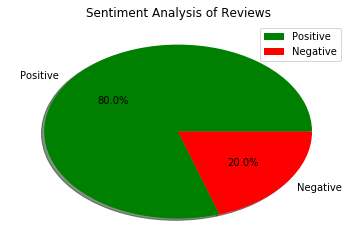

In [40]:
from matplotlib import pyplot as plt
slices = [sentiment["Positive"],sentiment["Negative"]]
activities = ['Positive','Negative']
cols = ['g','r']

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of Reviews')
plt.legend()
plt.show()